## **SDP Datasets:**

https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer

https://www.kaggle.com/datasets/akashnath29/lung-cancer-dataset/data

https://www.kaggle.com/datasets/humairmunir/lung-cancer-risk-dataset

# **Document structure for Diplomski:**
- Introductions
- Merging the datasets and preprocessing (where data is going to be either True or False, 1-0)
- Exploratory Data Analysis
- Training the models
- Results and Conclusion

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data and explore
df = pd.read_csv('merged_cancer.csv')

df.info()
print(df.head())
print(df.shape)

# Remove nulls and duplicates (already removed when merging)
print(df.isnull().sum())
print(df.duplicated().sum())
# df.drop_duplicates(inplace=True)

# Basic statistics
#print(df.describe(include='all'))
print(df.describe().T)

count = df['lung_cancer'].value_counts().get(1, 0)
print("Occurrences of Cnacer:", count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   gender                 6264 non-null   int64
 1   age                    6264 non-null   int64
 2   smoking                6264 non-null   int64
 3   yellow_fingers         6264 non-null   int64
 4   anxiety                6264 non-null   int64
 5   peer_pressure          6264 non-null   int64
 6   chronic_disease        6264 non-null   int64
 7   fatigue                6264 non-null   int64
 8   allergy                6264 non-null   int64
 9   wheezing               6264 non-null   int64
 10  alcohol                6264 non-null   int64
 11  coughing               6264 non-null   int64
 12  shortness_of_breath    6264 non-null   int64
 13  swallowing_difficulty  6264 non-null   int64
 14  chest_pain             6264 non-null   int64
 15  lung_cancer            6264 non-null  

# **Heatmap**

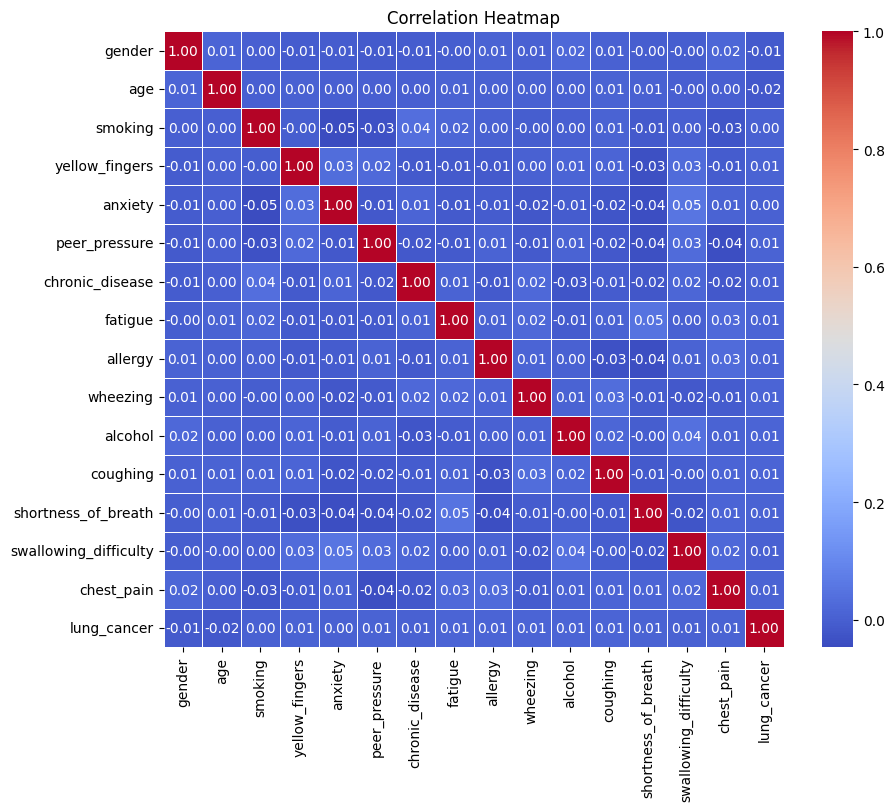

In [ ]:
# Convert categorical data to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)
# print(pd.get_dummies(df, drop_first=True))
# Encodes any data if neceserry to some other standard (Usually True or False)

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **Visualizing Age Groups**

/tmp/ipython-input-2670017524.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='lung_cancer', y='age', data=df, ax=ax[2], palette='pastel')


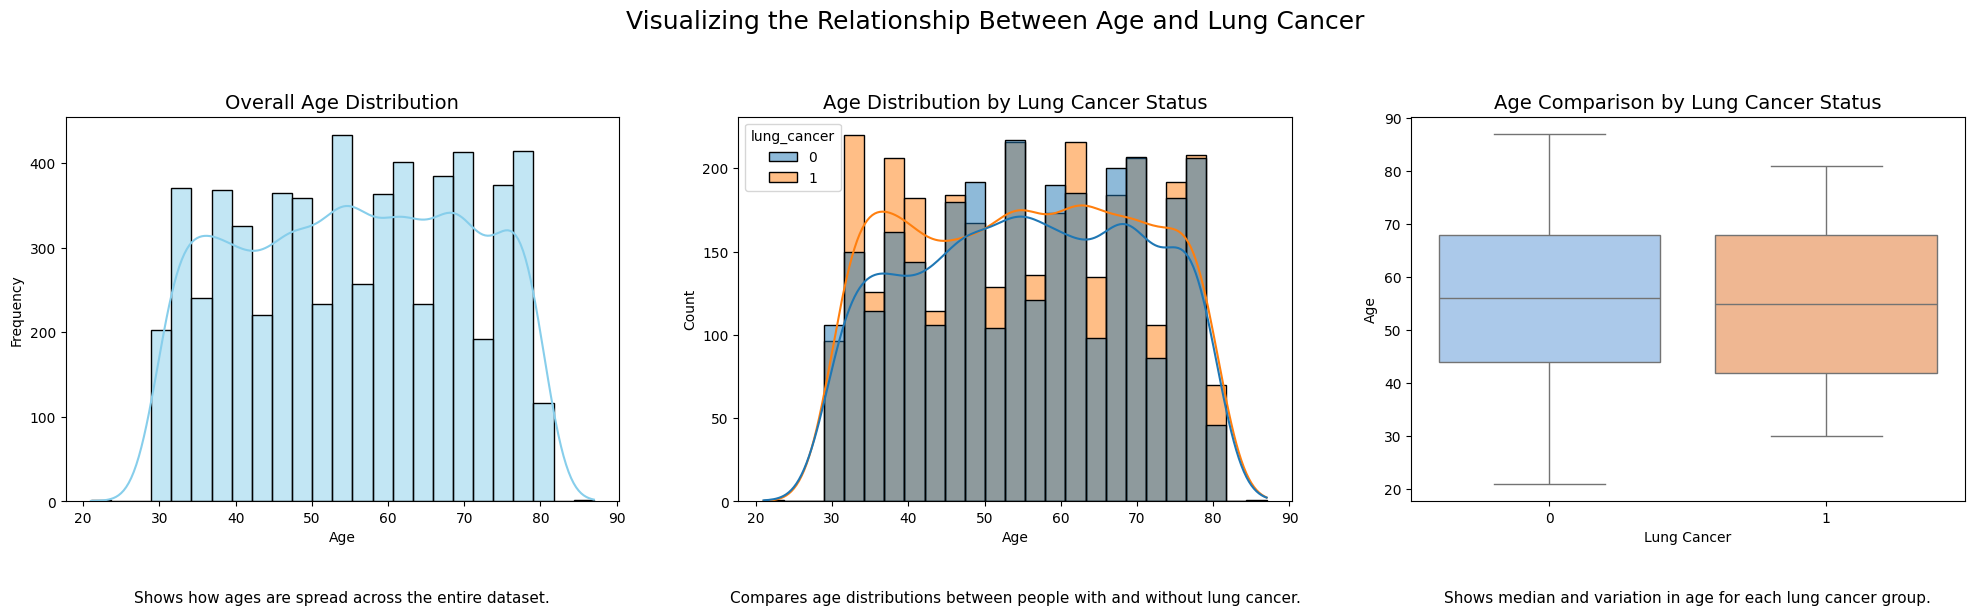

In [ ]:
# Separate continuous and categorical columns
con_col = ['age']
cat_col = [i for i in df.columns if i != 'age']

# Create figure with 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# --- Plot 1: Overall Age Distribution ---
sns.histplot(df['age'], kde=True, ax=ax[0], color='skyblue')
ax[0].set_title("Overall Age Distribution", fontsize=14)
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Frequency")
ax[0].text(
    0.5, -0.25,
    "Shows how ages are spread across the entire dataset.",
    ha='center', va='center', transform=ax[0].transAxes, fontsize=11
)

# --- Plot 2: Age Distribution by Lung Cancer Status ---
sns.histplot(data=df, x='age', hue='lung_cancer', kde=True, ax=ax[1])
ax[1].set_title("Age Distribution by Lung Cancer Status", fontsize=14)
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Count")
ax[1].text(
    0.5, -0.25,
    "Compares age distributions between people with and without lung cancer.",
    ha='center', va='center', transform=ax[1].transAxes, fontsize=11
)

# --- Plot 3: Age vs. Lung Cancer (Boxplot) ---
sns.boxplot(x='lung_cancer', y='age', data=df, ax=ax[2], palette='pastel')
ax[2].set_title("Age Comparison by Lung Cancer Status", fontsize=14)
ax[2].set_xlabel("Lung Cancer")
ax[2].set_ylabel("Age")
ax[2].text(
    0.5, -0.25,
    "Shows median and variation in age for each lung cancer group.",
    ha='center', va='center', transform=ax[2].transAxes, fontsize=11
)

# --- Overall Figure Title ---
plt.suptitle("Visualizing the Relationship Between Age and Lung Cancer", fontsize=18, y=1.05)

plt.tight_layout()
plt.show()


# **Visualizing Correlation of Data**

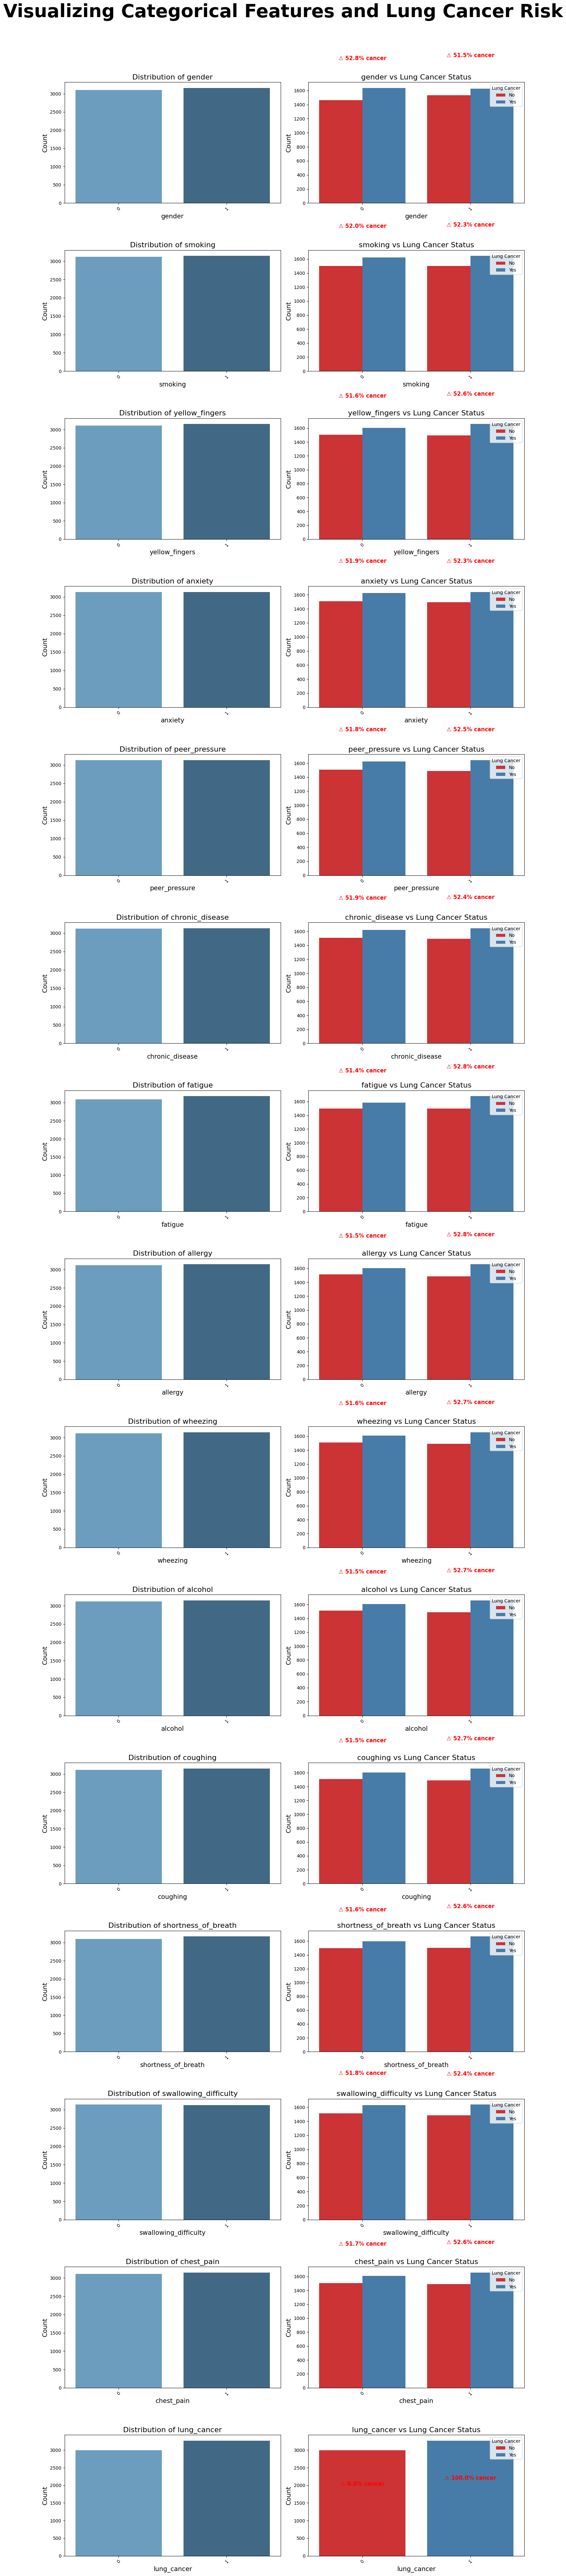

In [ ]:
# Left chart → how common each category is overall (e.g., how many smokers vs non-smokers)
# Right chart → whether that category correlates visually with lung cancer occurrence

fig, ax = plt.subplots(15, 2, figsize=(15, 80))

for index, i in enumerate(cat_col):
    # --- Overall distribution (left plot) ---
    sns.countplot(
        data=df, x=i, hue=i, ax=ax[index, 0], palette="Blues_d", legend=False
    )
    ax[index, 0].set_title(f"Distribution of {i}", fontsize=16)
    ax[index, 0].set_xlabel(i, fontsize=14)
    ax[index, 0].set_ylabel("Count", fontsize=14)
    ax[index, 0].tick_params(axis='x', rotation=45)

    # --- Lung cancer distribution (right plot) ---
    sns.countplot(data=df, x=i, hue='lung_cancer', ax=ax[index, 1], palette="Set1")
    ax[index, 1].set_title(f"{i} vs Lung Cancer Status", fontsize=16)
    ax[index, 1].set_xlabel(i, fontsize=14)
    ax[index, 1].set_ylabel("Count", fontsize=14)
    ax[index, 1].legend(title="Lung Cancer", labels=["No", "Yes"])
    ax[index, 1].tick_params(axis='x', rotation=45)

    # --- Highlight the "risky" categories ---
    # Compute % of lung cancer for each category (safe from column collision)
    risk_df = (
        df.groupby(i)["lung_cancer"]
        .mean()
        .rename("cancer_rate")
        .sort_values(ascending=False)
        .reset_index()
    )

    top_risk = risk_df.head(2)

    for _, row in top_risk.iterrows():
        ax[index, 1].text(
            x=row[i],
            y=df[df[i] == row[i]].shape[0] * 0.65,
            s=f"⚠️ {row['cancer_rate']*100:.1f}% cancer",
            ha='center',
            va='bottom',
            color='red',
            fontsize=12,
            fontweight='bold'
        )

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle(
    "Visualizing Categorical Features and Lung Cancer Risk",
    fontsize=40,
    fontweight='bold'
)
plt.show()


# **Visualizing Correlation of Age and other columns**

Text(0.5, 0.98, 'Visualizing AGE vs Categorical Columns')

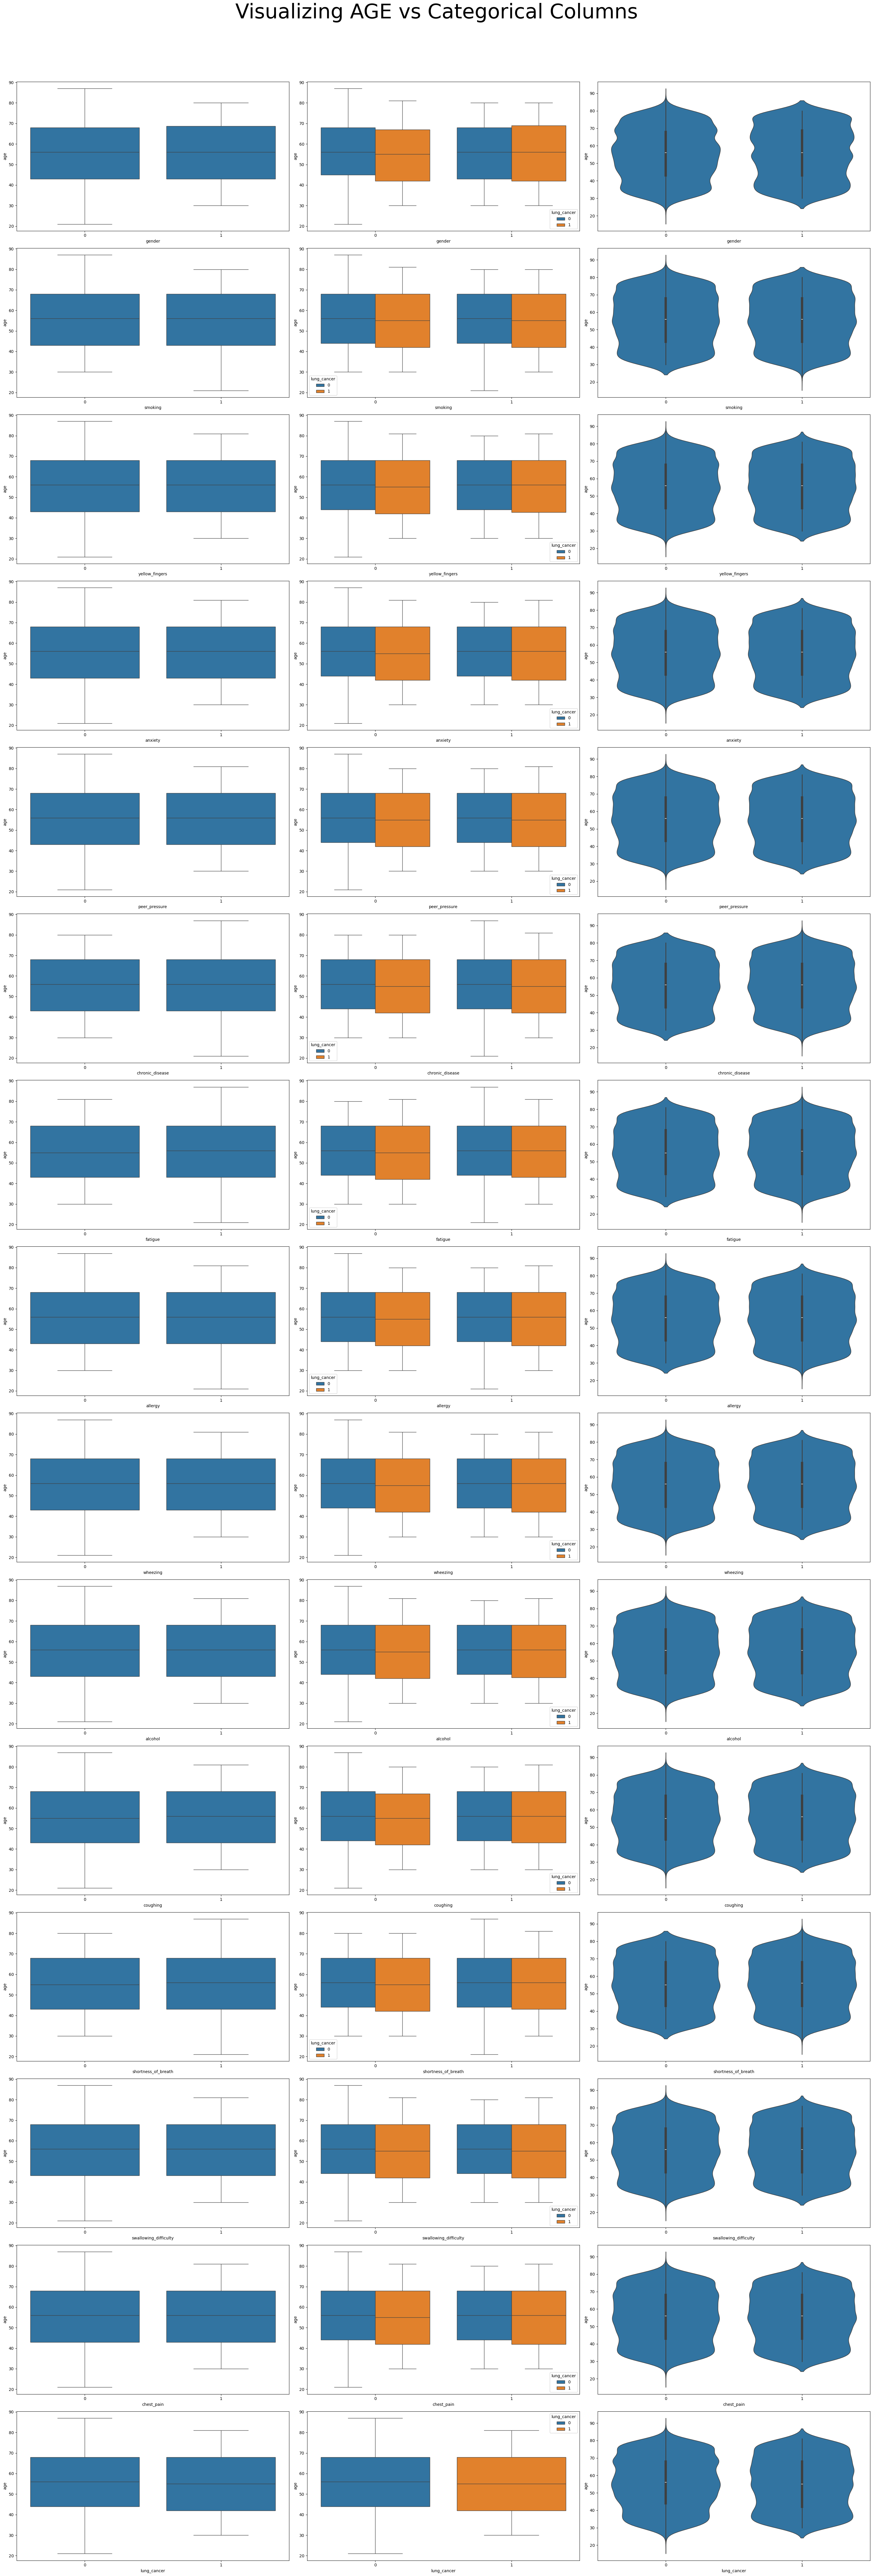

In [ ]:
fig,ax = plt.subplots(15,3,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.boxplot(x=df[i],y=df['age'],ax=ax[index,0])
    sns.boxplot(x=df[i],y=df['age'],ax=ax[index,1],hue=df['lung_cancer'])
    sns.violinplot(x=df[i],y=df['age'],ax=ax[index,2])
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing AGE vs Categorical Columns",fontsize=50)

# **Positive cases by age and gender**

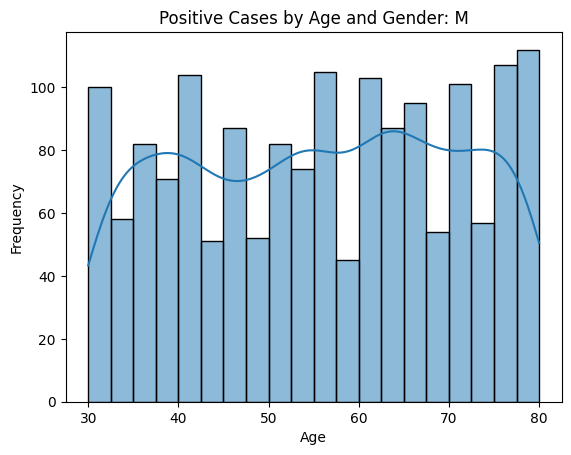

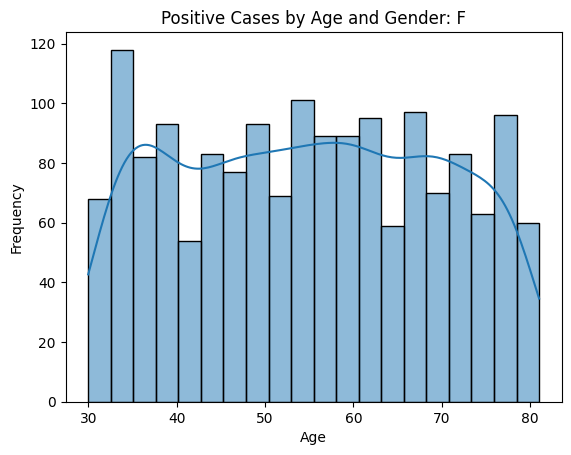

In [ ]:
# Plot histograms
for x in df['gender'].unique():
    plt.figure()  # Create a new figure
    sns.histplot(df.loc[(df['gender'] == x) & (df['lung_cancer'] == 1)]['age'], kde=True, bins=20)
    if x == 1:
      x = "M"
    else:
      x = "F"
    plt.title(f'Positive Cases by Age and Gender: {x}')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()  # Display the plot

# **Seeing what a trained model may look like**

Age above 80: 3
Age below 30: 1


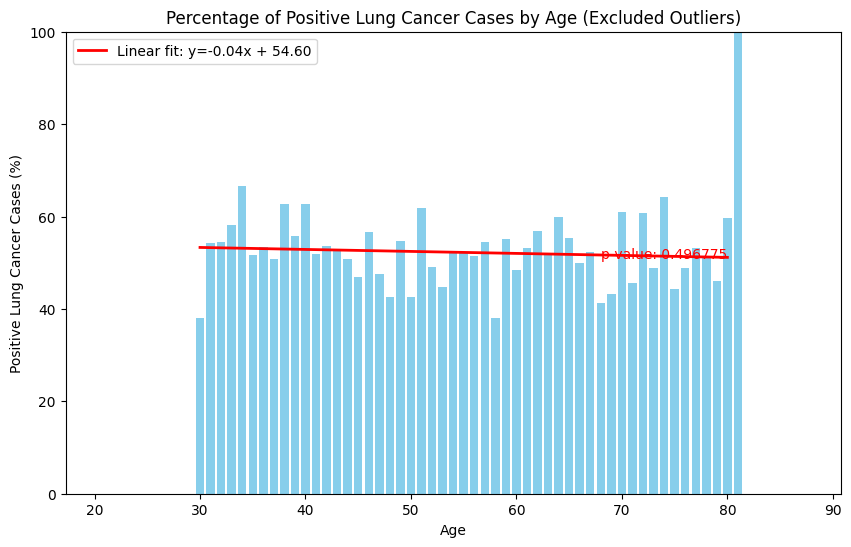

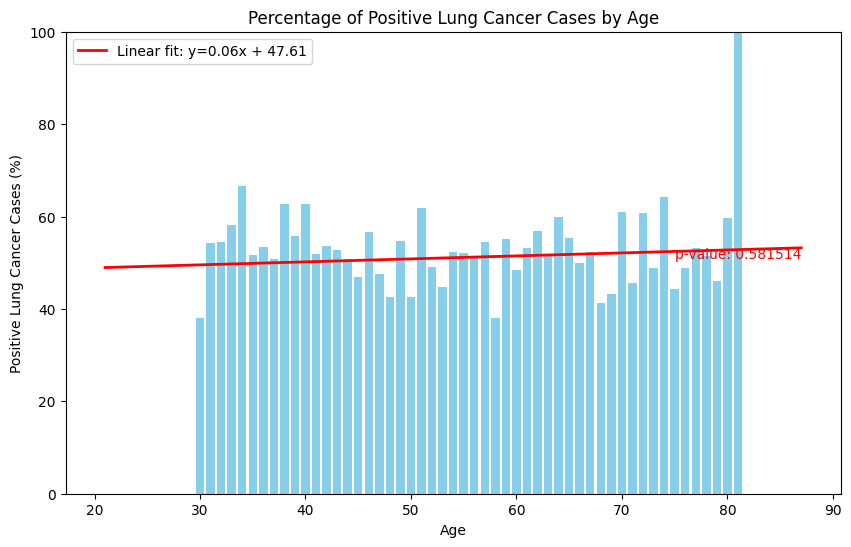

In [ ]:
from scipy.stats import linregress

count_under_30 = df[df['age'] < 30].shape[0]
count_above_80 = df[df['age'] > 80].shape[0]
print("Age above 80: " + str(count_above_80))
print("Age below 30: " + str(count_under_30))

# Calculate the percentage of positive lung cancer cases by age
positive_counts = df[df['lung_cancer'] == 1]['age'].value_counts()
total_counts = df['age'].value_counts()

# Fill missing ages with 0 before dividing
positive_percent = (positive_counts.reindex(total_counts.index, fill_value=0) / total_counts) * 100
positive_percent = positive_percent.sort_index()

# Sort by age
positive_percent = positive_percent.sort_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(positive_percent.index, positive_percent.values, color='skyblue')

# WARNING! IMPORTANT! setting age limits due to weird data (one instance of high or low age
# results in messing with the P-value, need something more realistic)
age_min = 29
age_max = 80
filtered = positive_percent[(positive_percent.index >= age_min) & (positive_percent.index <= age_max)]

# Linear regression
x = filtered.index.values
y = filtered.values
slope, intercept, r_value, p_value, std_err = linregress(x, y)
y_fit = slope * x + intercept

# Plot the linear regression line
plt.plot(x, y_fit, color='red', linewidth=2, label=f'Linear fit: y={slope:.2f}x + {intercept:.2f}')

# Add p-value to the plot
plt.text(max(x), max(y_fit), f'p-value: {p_value:.6f}', ha='right', va='top', color='red')

# Add title and labels
plt.title('Percentage of Positive Lung Cancer Cases by Age (Excluded Outliers)')
plt.xlabel('Age')
plt.ylabel('Positive Lung Cancer Cases (%)')
plt.ylim(0, 100)  # Set y-axis limits to 0-100%
plt.legend()

# Show the plot
plt.show()
#_________________________________________________________________________________________________________________
# P-Value without limits to age (outliers)
# Calculate the percentage of positive lung cancer cases by age
positive_counts = df[df['lung_cancer'] == 1]['age'].value_counts()
total_counts = df['age'].value_counts()

# Fill missing ages with 0 before dividing
positive_percent = (positive_counts.reindex(total_counts.index, fill_value=0) / total_counts) * 100
positive_percent = positive_percent.sort_index()

# Sort by age
positive_percent = positive_percent.sort_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(positive_percent.index, positive_percent.values, color='skyblue')
# Linear regression
x = positive_percent.index.values
y = positive_percent.values
slope, intercept, r_value, p_value, std_err = linregress(x, y)
y_fit = slope * x + intercept

# Plot the linear regression line
plt.plot(x, y_fit, color='red', linewidth=2, label=f'Linear fit: y={slope:.2f}x + {intercept:.2f}')

# Add p-value to the plot
plt.text(max(x), max(y_fit), f'p-value: {p_value:.6f}', ha='right', va='top', color='red')

# Add title and labels
plt.title('Percentage of Positive Lung Cancer Cases by Age')
plt.xlabel('Age')
plt.ylabel('Positive Lung Cancer Cases (%)')
plt.ylim(0, 100)  # Set y-axis limits to 0-100%
plt.legend()

# Show the plot
plt.show()

# **Experimenting**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Prepare the features (X) and target (y)
X = df.drop(columns='lung_cancer')  # all columns except the target column
y = df['lung_cancer']  # target variable

# Optionally, encode categorical variables (if there are any categorical columns)
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------- Logistic Regression: Fit and get feature importance -------------
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Get the coefficients for each feature
coef = logreg.coef_[0]
features = X.columns  # feature names

# Create a DataFrame for the feature importances based on coefficients
feature_importance_logreg = pd.DataFrame({
    'Feature': features,
    'Coefficient': coef,
    'Abs_Coefficient': abs(coef)
})

# Sort by the absolute value of the coefficients (most impactful features)
feature_importance_logreg = feature_importance_logreg.sort_values(by='Abs_Coefficient', ascending=False)

print("Logistic Regression Feature Importance:")
print(feature_importance_logreg)

# ------------- Random Forest Classifier: Fit and get feature importance -------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances from the trained model
importances = rf.feature_importances_

# Create a DataFrame for Random Forest feature importances
feature_importance_rf = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort by importance score (most important features)
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importance:")
print(feature_importance_rf)


Logistic Regression Feature Importance:
                  Feature  Coefficient  Abs_Coefficient
7                 fatigue     0.092794         0.092794
0                  gender    -0.068777         0.068777
14             chest_pain     0.067757         0.067757
11               coughing     0.062959         0.062959
8                 allergy     0.054950         0.054950
12    shortness_of_breath     0.045369         0.045369
6         chronic_disease     0.032036         0.032036
3          yellow_fingers     0.028358         0.028358
4                 anxiety    -0.023546         0.023546
5           peer_pressure     0.018765         0.018765
10                alcohol     0.018701         0.018701
13  swallowing_difficulty     0.015680         0.015680
2                 smoking     0.006246         0.006246
9                wheezing     0.005618         0.005618
1                     age    -0.004358         0.004358
Random Forest Feature Importance:
                  Feature  Imp